## Function Transformer

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv("./DATA/titanic.csv")

In [3]:
df = df[["Survived", "Age", "Fare"]]
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df["Age"].fillna(df["Age"].mean(), inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_4680\1809399462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(), inplace=True)


In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

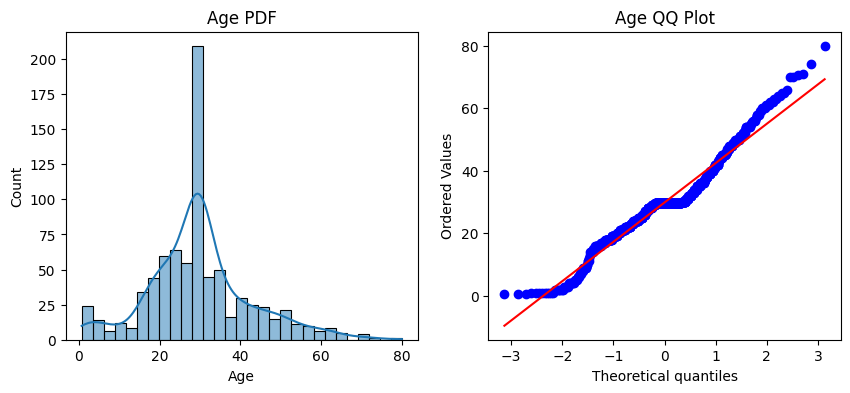

In [8]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.histplot(X_train["Age"], kde=True)  # Use sns.histplot for subplots
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age QQ Plot")

plt.show()

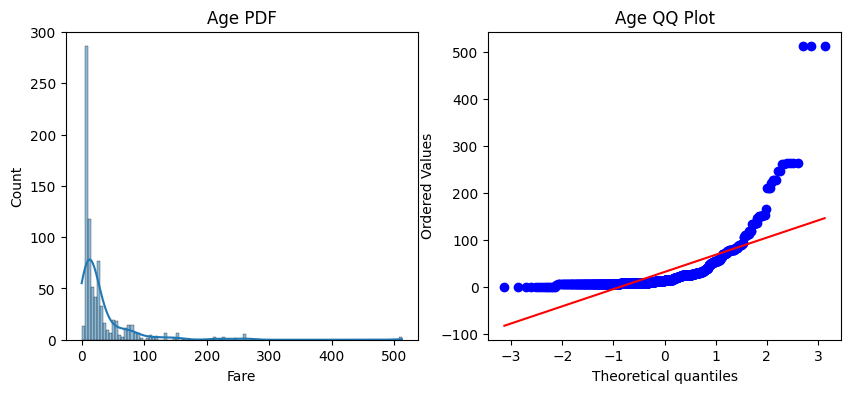

In [9]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.histplot(X_train["Fare"], kde=True)  # Use sns.histplot for subplots
plt.title("Age PDF")

plt.subplot(122)
stats.probplot(X_train["Fare"], dist="norm", plot=plt)
plt.title("Age QQ Plot")

plt.show()

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print(f"Accuracy for LR: f{accuracy_score(y_test, y_pred1): 2f}")
print(f"Accuracy for DT: f{accuracy_score(y_test, y_pred2): 2f}")

Accuracy for LR: f 0.700000
Accuracy for DT: f 0.700000


## Transforming the Right Skew Column with Log

In [11]:
from sklearn.preprocessing import FunctionTransformer

trf = FunctionTransformer(func=np.log1p) # log1p add 1 so escape from 0 value 

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

clf_1 = LogisticRegression()
clf_2 = DecisionTreeClassifier()

clf_1.fit(X_train_transformed, y_train)
clf_2.fit(X_train_transformed, y_train)

y_pred_1 = clf_1.predict(X_test_transformed)
y_pred_2 = clf_2.predict(X_test_transformed)

print(f"Accuract LR: {accuracy_score(y_test, y_pred_1)}")
print(f"Accuract DT: {accuracy_score(y_test, y_pred_2)}")

Accuract LR: 0.7
Accuract DT: 0.7111111111111111


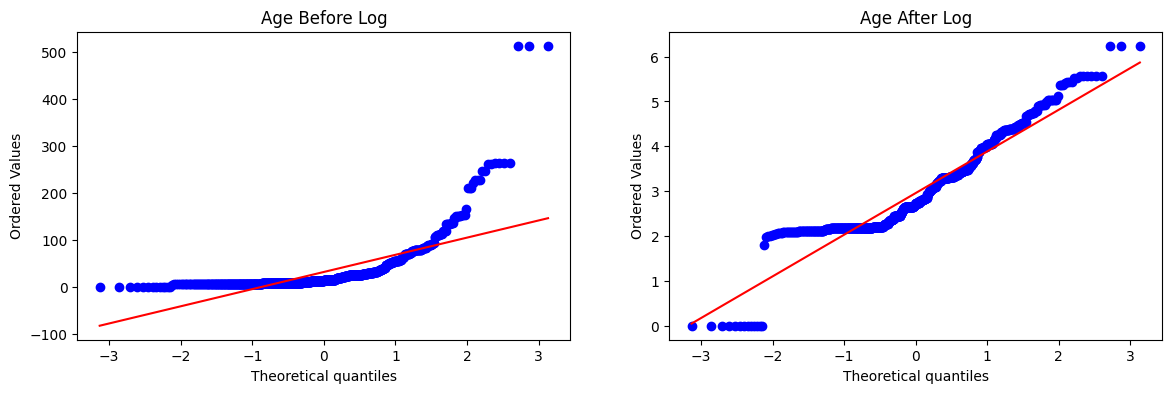

In [12]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train["Fare"], dist="norm", plot=plt)
plt.title("Age Before Log")

plt.subplot(122)
stats.probplot(X_train_transformed["Fare"], dist="norm", plot=plt)
plt.title("Age After Log")

plt.show()

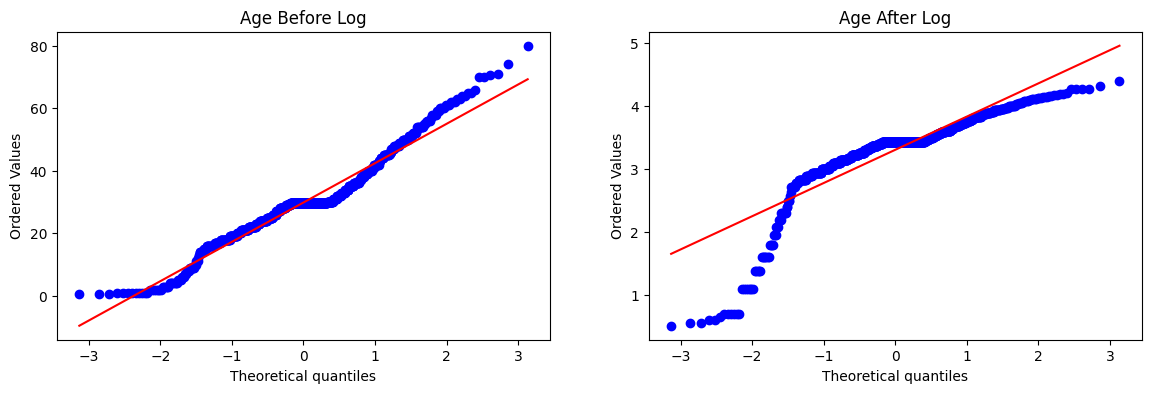

In [13]:
plt.figure(figsize=(14, 4))

plt.subplot(121)
stats.probplot(X_train["Age"], dist="norm", plot=plt)
plt.title("Age Before Log")

plt.subplot(122)
stats.probplot(X_train_transformed["Age"], dist="norm", plot=plt)
plt.title("Age After Log")

plt.show()

In [14]:
trf2 = ColumnTransformer([
    ("log", FunctionTransformer(np.log1p),
     ["Fare"])
], remainder="passthrough")

X_train_transformed_2 = trf2.fit_transform(X_train)
X_test_transformed_2 = trf2.transform(X_test)

In [15]:
X_train_transformed_2.shape

(801, 2)

In [16]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed_2, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred1 = clf1.predict(X_test_transformed_2)
y_pred2 = clf2.predict(X_test_transformed_2)

print(f"Accuracy LR: {accuracy_score(y_test, y_pred1)}")
print(f"Accuracy DT: {accuracy_score(y_test, y_pred2)}")

Accuracy LR: 0.6666666666666666
Accuracy DT: 0.6


C:\Users\acer\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Other Transformation

Transformation like Reciprocal, square etc

In [33]:
def apply_transform(transform_name: str, transform: FunctionTransformer):
    X = df.iloc[:, 1:]
    y = df.iloc[:, 0]
    
    trf = ColumnTransformer(
        [(transform_name , FunctionTransformer(transform), ["Fare"])],
        remainder="passthrough"
    )
    
    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()
    print(f"Accuracy: {np.mean(cross_val_score(clf, X_trans, y, scoring="accuracy", cv=5))}")
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(121)
    stats.probplot(X["Fare"], dist="norm", plot=plt)
    plt.title(f"Fare before {transform_name} transformation")
    
    plt.subplot(122)
    stats.probplot(X_trans[:, 0], dist="norm", plot=plt)
    plt.title(f"Fare after {transform_name} Transformation")
    
    plt.show()

Accuracy: 0.6588726382524637


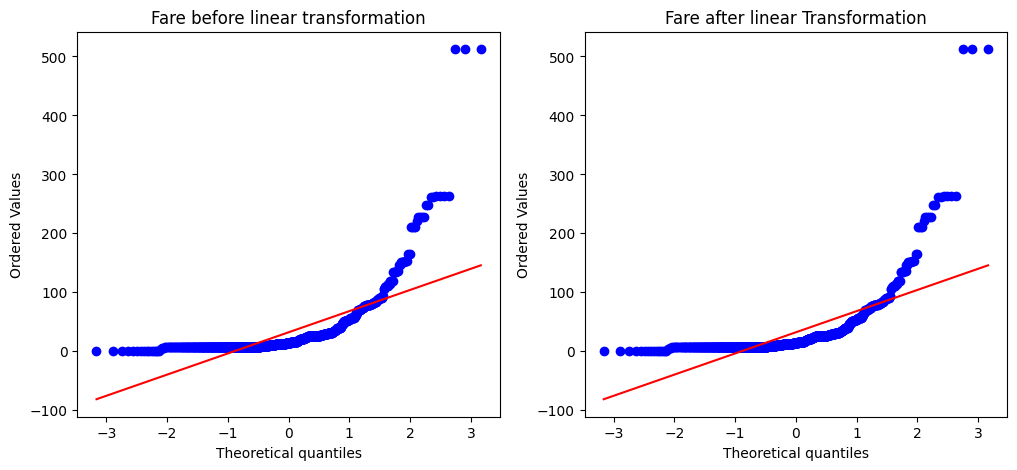

In [34]:
apply_transform("linear", lambda x: x)

Accuracy: 0.6712635741635804


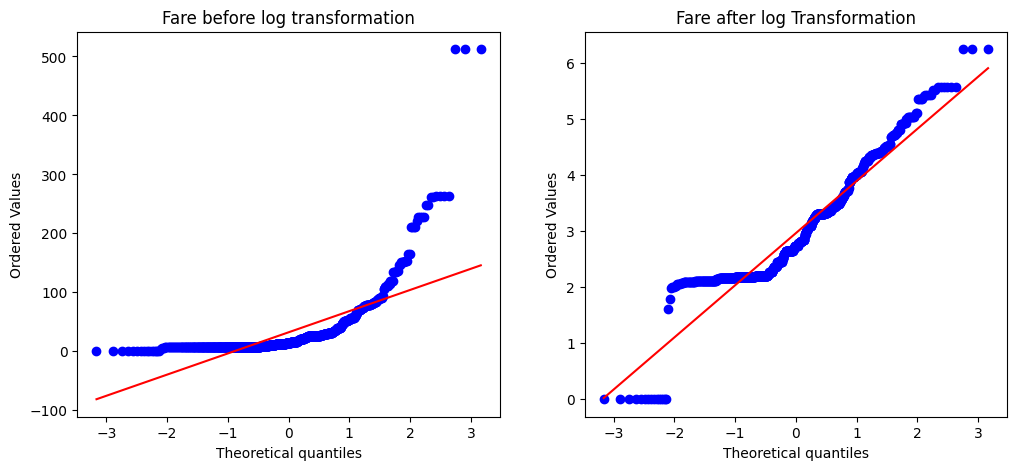

In [35]:
apply_transform("log", np.log1p)

Accuracy: 0.6161634548992531


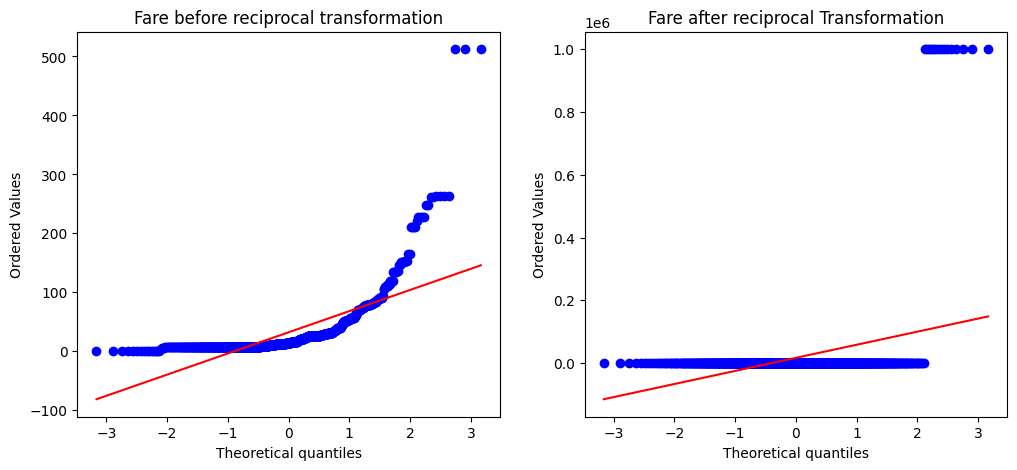

In [46]:
apply_transform("reciprocal", lambda x: 1/(x+0.000001))

This is data transformation